# 첫구매별 물품 재구매 확률
2022-11-17

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_sale = pd.read_csv('./data/new_sales4.csv',encoding='euc-kr')

In [10]:
df_sale['배송완료일'] = df_sale['배송완료일'].astype('datetime64')
df_sale['구매일'] = df_sale['구매일'].astype('datetime64')
df_sale['배송기간'] = df_sale['배송완료일'] - df_sale['구매일']

<AxesSubplot:xlabel='구매일'>

/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


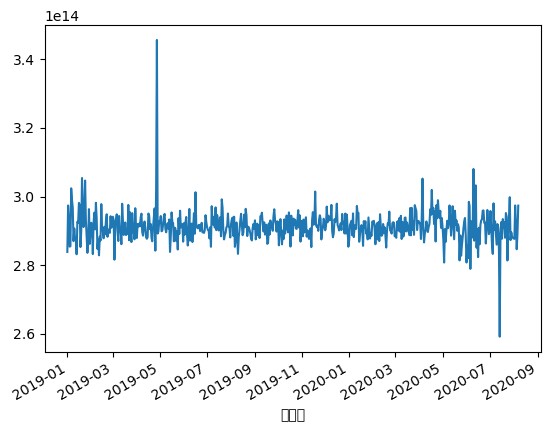

In [12]:
df_sale.groupby('구매일')['배송기간'].mean().plot()

In [ ]:
tee1.head()

,고객번호,물품대분류
0,201812310749735,수유용품
1,201812310749770,티슈
2,201812310749771,3단계
3,201812310749774,3단계
4,201812310749780,이벤트


In [ ]:
df_tmp = df_sale.groupby('고객번호')['주문번호'].apply(list).apply(lambda x:x[:2]).reset_index()

In [ ]:
df_tmp2 = df_tmp[df_tmp['주문번호'].apply(len) > 1]

In [ ]:
df_tmp2

,고객번호,주문번호
0,201812310749735,"[201905052342970, 202002203424450]"
3,201812310749774,"[201905092356247, 201907282649358]"
5,201812310749783,"[201901161908099, 201906302542644]"
6,201812310749784,"[201904292316940, 201906242522007]"
7,201812310749787,"[201812311861810, 201901201920825]"
...,...,...
81045,201912281057984,"[202002223431991, 202002223431991]"
81047,201912281057991,"[202001153300382, 202004053627524]"
81048,201912281057997,"[20200706205941-05897002163, 20200706205941-05..."
81051,201912281058006,"[201912283245106, 20200521172454-86563196093]"


In [ ]:
tmp1 = df_tmp2['주문번호'].apply(lambda x:x[0][:8])
tmp2 = df_tmp2['주문번호'].apply(lambda x:x[1][:8])

In [ ]:
(tmp2.astype('datetime64') - tmp1.astype('datetime64')).dt.days

0        291
3         80
5        165
6         56
7         20
        ... 
81045      0
81047     81
81048      0
81051    145
81054    184
Name: 주문번호, Length: 36231, dtype: int64

In [ ]:
# 첫구매 후 90일 이내 재 구매한 사람과 첫구매 물품
tee1.loc[(tmp2.astype('datetime64') - tmp1.astype('datetime64')).dt.days]

,고객번호,물품대분류
291,201901010750549,생리대
80,201812310750006,수유용품
165,201901010750228,수유용품
56,201812310749934,수유용품
20,201812310749833,5단계
...,...,...
0,201812310749735,수유용품
81,201812310750007,4단계
0,201812310749735,수유용품
145,201901010750177,1단계


In [ ]:
# 두번째 구매까지 걸린 시간
tmp3 = (tmp2.astype('datetime64') - tmp1.astype('datetime64')).dt.days

In [ ]:
tmp4 = tee1.loc[tmp3.index]

In [ ]:
tmp4['두번째구매까지기간'] = tmp3

In [ ]:
tmp4.to_csv('./data/두번째까지기간.csv', encoding='euc-kr', index=False)

In [ ]:
tmp4[tmp4['두번째구매까지기간'] <= 90]['물품대분류'].value_counts() / tee1['물품대분류'].value_counts()

1단계        0.420851
2단계        0.453810
3단계        0.426262
4단계        0.350451
5단계        0.328189
6단계        0.313894
7단계        0.363636
기타         0.333333
마스크        0.300052
맘큐         0.119512
생리대        0.377158
수유용품       0.404666
아이_생활용품    0.401965
어른_생활용품    0.409738
음식         0.184426
이벤트        0.350949
장난감        0.394928
주방용품       0.313938
청결용품       0.361666
티슈         0.280215
화장품        0.340489
Name: 물품대분류, dtype: float64

In [ ]:
tee1['물품대분류'].value_counts()

맘큐         11547
이벤트        11221
수유용품       10888
티슈          8754
2단계         6181
3단계         6123
생리대         4229
주방용품        3867
4단계         3213
청결용품        2353
아이_생활용품     2239
1단계         2091
화장품         2003
5단계         1944
마스크         1913
어른_생활용품     1335
6단계          583
장난감          276
음식           244
7단계           33
기타            18
Name: 물품대분류, dtype: int64